# Selecting methods
We are selecting the results based on: 
    1. Lowest Davies Bouldin Index
    2. Highest Calinski and Harabaz
    3. Highest Silhouette

In [23]:
import sys
sys.path.append('../')
from src import optimizer as _optimizer
from src import reader as _reader
from src import visualization as _visualization
from src import metrics as _metrics
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

## Best using Davies Bouldin - 3.52

In [2]:
X_bow_norm = _reader.readBOW()
hc_bow_norm = _optimizer.fcluster_cut(X_bow_norm, max_d=4)
_metrics.applyAllMetrics(X_bow_norm,hc_bow_norm)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Davies Bouldin
3.525226873692287

Calinski and Harabaz
14.864438858168958

Silhouette Score
-0.0013514428333833246



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

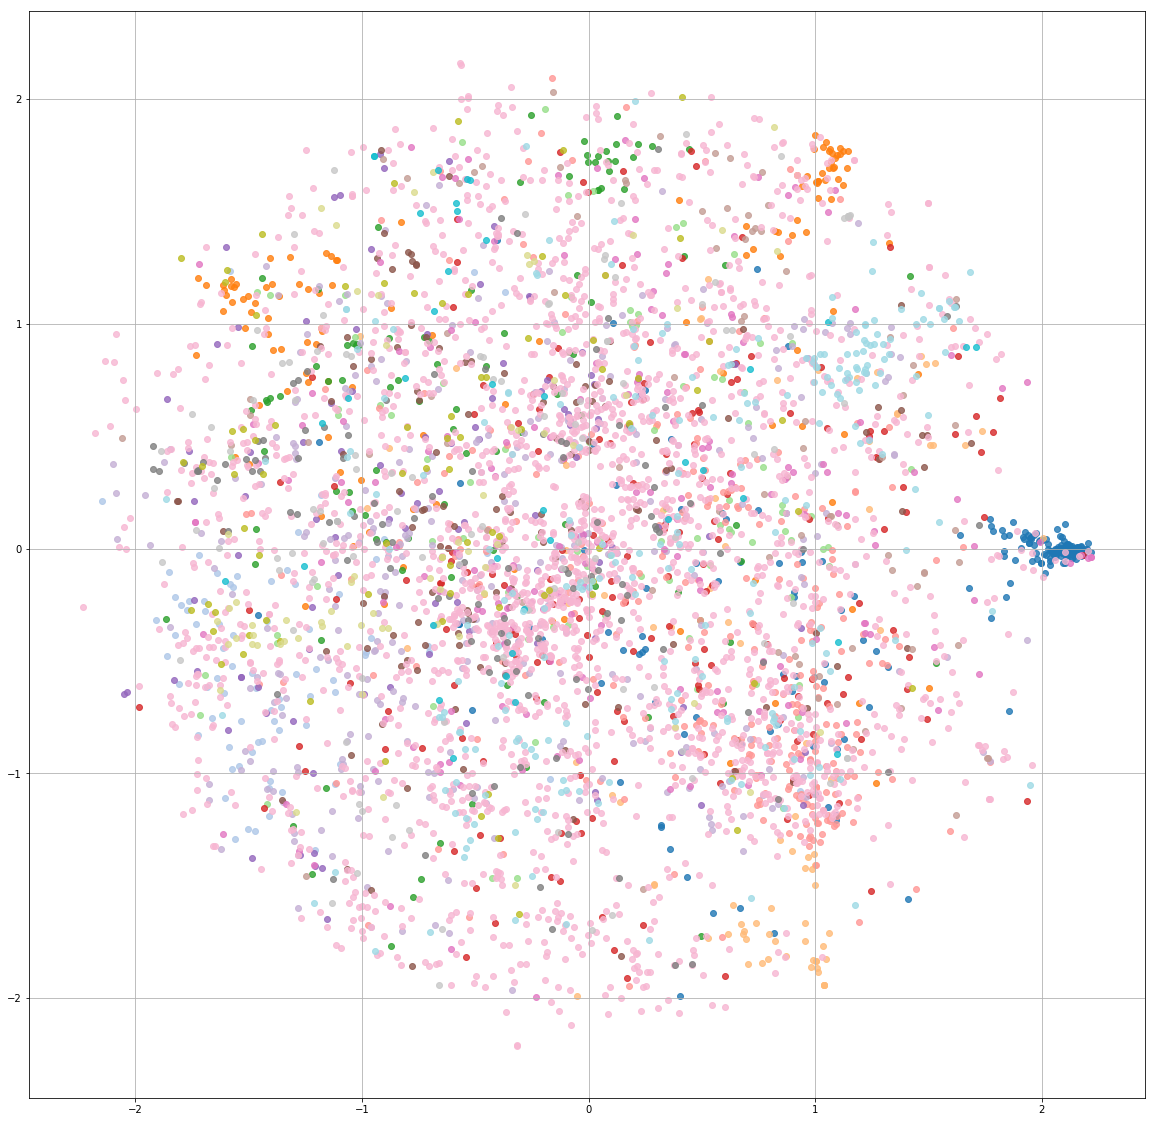

In [15]:
from importlib import reload 
reload(_visualization)
smp_sz = 5000
tsne_labels = _visualization.create_tsne_labels(X_bow_norm, smp_sz)
_visualization.visualize_sup_scatter(tsne_labels, hc_bow_norm[:smp_sz])

(array([0.0036568 , 0.00315976, 0.00230769, 0.00584615, 0.00543195,
        0.00364497, 0.02912426, 0.00223669, 0.0012426 , 0.00252071]),
 array([  1. ,  17.9,  34.8,  51.7,  68.6,  85.5, 102.4, 119.3, 136.2,
        153.1, 170. ]),
 <a list of 10 Patch objects>)

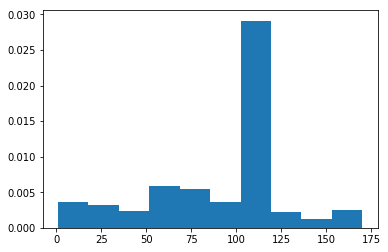

In [24]:
plt.hist(hc_bow_norm[:smp_sz], normed=True)

## Best using Calinski and Harabaz - 100.18

In [3]:
X_word2vec_non_norm = _reader.readWord2Vec(normed=False)
cluster_k = KMeans(n_clusters=22,random_state=42,n_jobs=-1)
kmeans_word2vec_non_norm = cluster_k.fit(X_word2vec_non_norm)
_metrics.applyAllMetrics(X_word2vec_non_norm,kmeans_word2vec_non_norm.labels_)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Davies Bouldin
4.728128216637011

Calinski and Harabaz
100.18037901039646

Silhouette Score
-0.012795965158441721



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

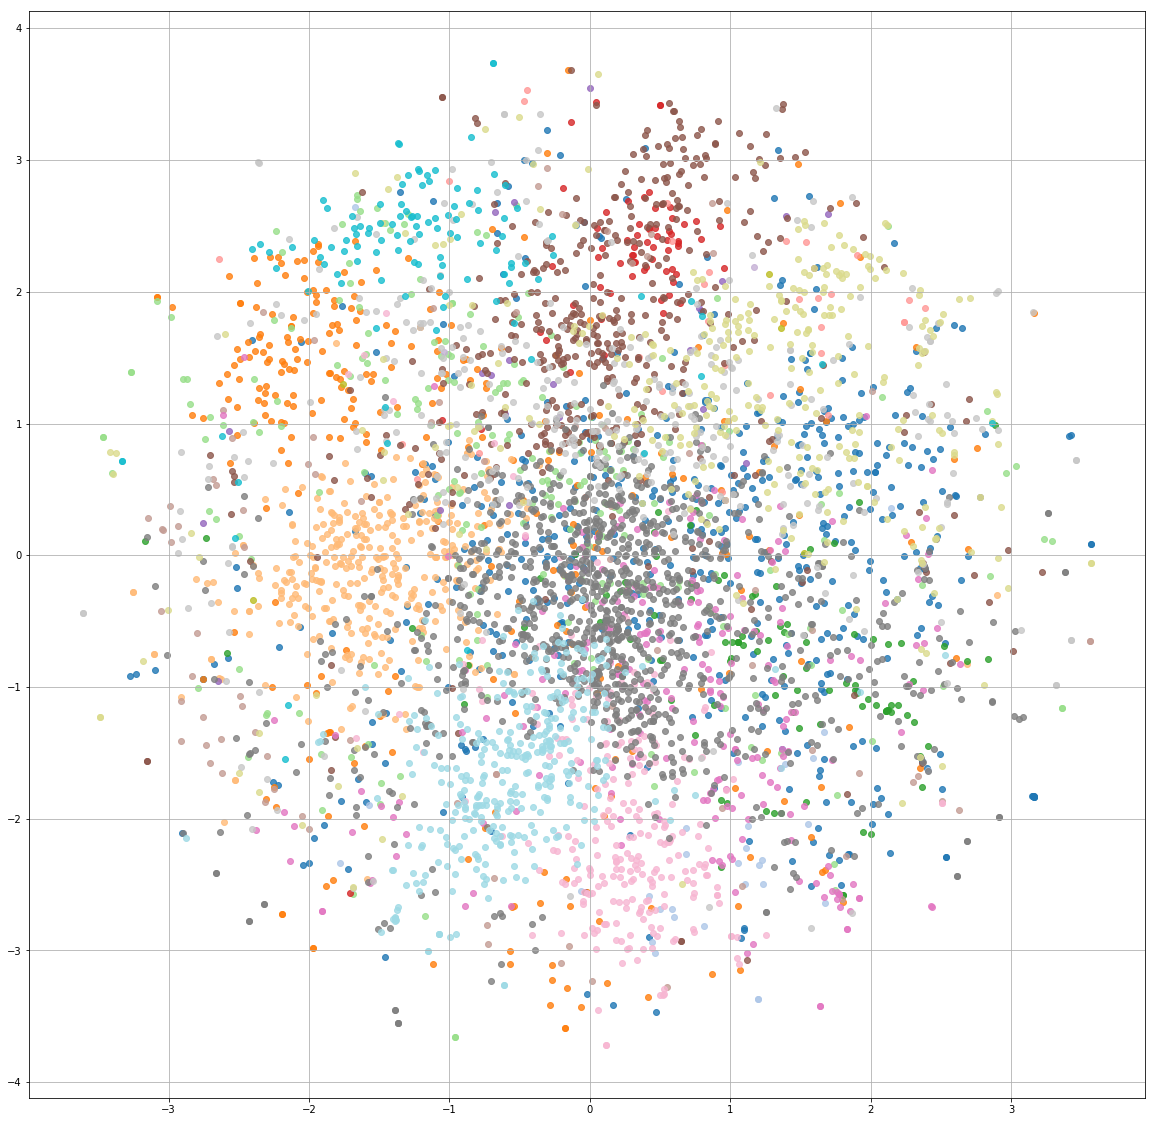

In [16]:
smp_sz = 5000
tsne_labels = _visualization.create_tsne_labels(X_word2vec_non_norm, smp_sz)
_visualization.visualize_sup_scatter(tsne_labels, kmeans_word2vec_non_norm.labels_[:smp_sz])

(array([0.05428571, 0.06457143, 0.03209524, 0.00942857, 0.00228571,
        0.04304762, 0.03161905, 0.12895238, 0.03485714, 0.07504762]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

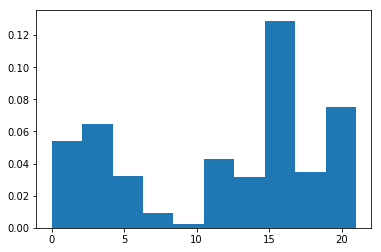

In [25]:
plt.hist(kmeans_word2vec_non_norm.labels_[:smp_sz], normed=True)

## Best using Silhouette Score - 0.539

In [4]:
X_BOW_non_norm = _reader.readBOW(normed=False)
cluster_k = KMeans(n_clusters=71,random_state=42,n_jobs=-1)
kmeans_BOW_non_norm = cluster_k.fit(X_BOW_non_norm)
_metrics.applyAllMetrics(X_BOW_non_norm,kmeans_BOW_non_norm.labels_)

['word2vec.csv', 'bags.csv', 'health.txt', 'health-dataset.zip', 'health-dataset']


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


Davies Bouldin
3.921060489769913

Calinski and Harabaz
34.69208953997376

Silhouette Score
0.053987225674466496



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

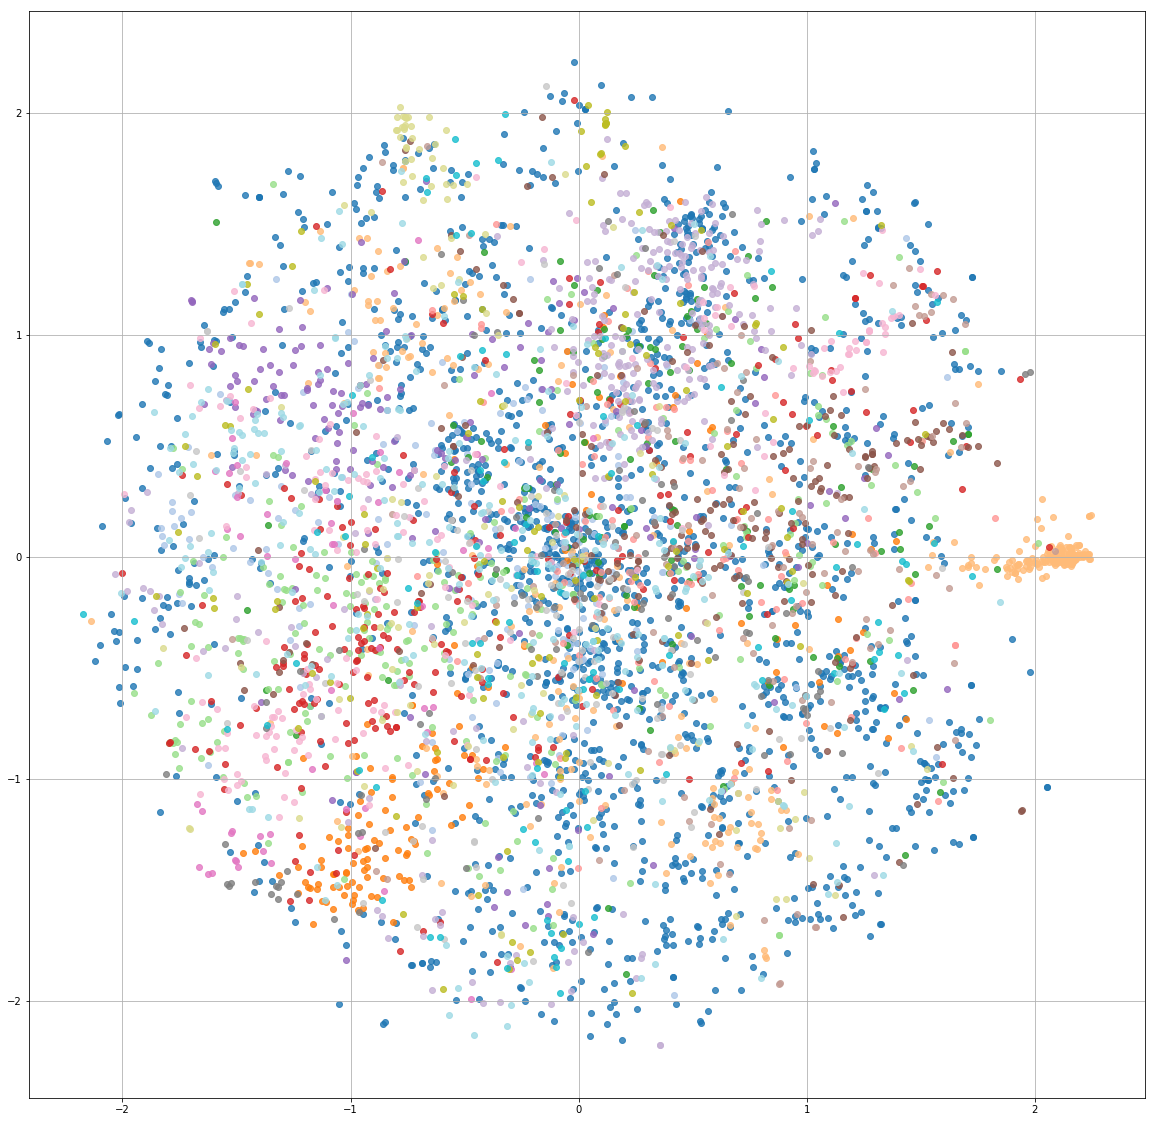

In [17]:
smp_sz = 5000
tsne_labels = _visualization.create_tsne_labels(X_BOW_non_norm, smp_sz)
_visualization.visualize_sup_scatter(tsne_labels, kmeans_BOW_non_norm.labels_[:smp_sz])

(array([0.05308571, 0.01445714, 0.01151429, 0.01182857, 0.01288571,
        0.00885714, 0.00782857, 0.00702857, 0.00748571, 0.00788571]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

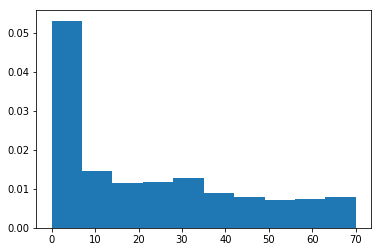

In [20]:
plt.hist(kmeans_BOW_non_norm.labels_[:smp_sz], normed=True)